In [1]:
import pyemma                                                                       
import os                                                                           
import matplotlib.pyplot as plt                                              
import numpy as np                                                                 
import pyemma.coordinates as coor 
import pyemma.msm as msm 
import pyemma.plots as mplt 
from pyemma import config
import pickle

## import the trained model

In [2]:
cluster = pickle.load(open('cluster_2.pkl','rb'))
msm = pickle.load(open('msm_2.pkl','rb'))
its = pickle.load(open('its.obj','rb'))

## load the encoded data

In [3]:
encoded = np.load("3_TAE_lat_lag_8_seed.npy")
scaled_en_0 = (encoded[:,0]-np.min(encoded[:,0]))/(np.max(encoded[:,0])-np.min(encoded[:,0]))
scaled_en_1 = (encoded[:,1]-np.min(encoded[:,1]))/(np.max(encoded[:,1])-np.min(encoded[:,1]))
scaled_encoded = np.column_stack([scaled_en_0,scaled_en_1])

## start manual pcca

# i)  getting the no of positive and negative clusters

In [4]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] > 0.0):
        j1=j1+1

    if(msm.eigenvectors_right()[i,1] < 0.0):
        j2=j2+1
print(j1,j2)


Mp = np.zeros((j1,4))
Mn = np.zeros((j2,4))

409 91


## save the right and left eigenvectors in arrays

In [5]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] > 0.0):
        Mp[j1][0] = i+1
        Mp[j1][1] = i
        Mp[j1][2] = msm.eigenvectors_right()[i,1]
        Mp[j1][3] = msm.eigenvectors_left()[0,i]
        j1=j1+1
    if(msm.eigenvectors_right()[i,1] < 0.0):
        Mn[j2][0] = i+1
        Mn[j2][1] = i
        Mn[j2][2] = msm.eigenvectors_right()[i,1]
        Mn[j2][3] = msm.eigenvectors_left()[0,i]
        j2=j2+1

## Create the mannual discrete trajectories

In [37]:
discrete_trajs = -1*np.ones_like(cluster.dtrajs).T  # shape 4022018 * 1

In [38]:
dtrajs = cluster.dtrajs

In [39]:
for i in range(Mp.shape[0]):
    temp = np.where(dtrajs==Mp[i,1])
    discrete_trajs[temp[1]] =0
    
for i in range(Mn.shape[0]):
    temp = np.where(dtrajs==Mn[i,1])
    discrete_trajs[temp[1]] = 1

In [40]:
np.shape(np.where(discrete_trajs==1))[1] + np.shape(np.where(discrete_trajs==0))[1]

4022018

## plot the states

In [41]:
np.shape(np.concatenate(discrete_trajs))

(4022018,)

In [36]:
np.savetxt('discrete_trajs.txt', discrete_trajs, fmt = '%6.0d')

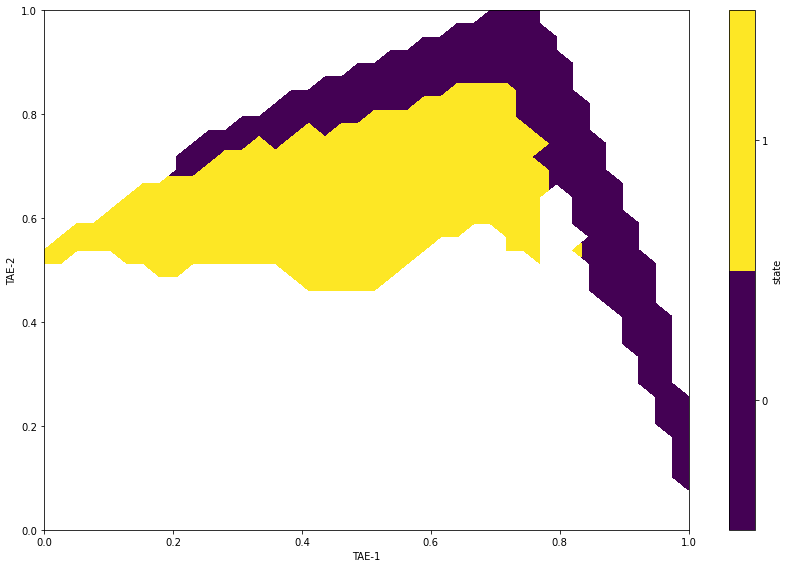

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *scaled_encoded.T,np.concatenate(discrete_trajs),nbins=40, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(0, 2))

ax.set_xlabel('TAE-1')
ax.set_ylabel('TAE-2')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.savefig('2_ststes_1.png',dpi=300)

## based on the observation do a mannual state decomposition

In [46]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] < 0.0) and (msm.eigenvectors_right()[i,2] > 0.0):
        j1=j1+1

    if(msm.eigenvectors_right()[i,1] < 0.0) and (msm.eigenvectors_right()[i,2] < 0.0):
        j2=j2+1
print(j1,j2)
Mnp = np.zeros((j1,4))
Mnn = np.zeros((j2,4))

61 30


In [49]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] < 0.0) and (msm.eigenvectors_right()[i,2] > 0.0):
        Mnp[j1][0] = i+1
        Mnp[j1][1] = i
        Mnp[j1][2] = msm.eigenvectors_right()[i,1]
        Mnp[j1][3] = msm.eigenvectors_left()[0,i]
        j1=j1+1
    if(msm.eigenvectors_right()[i,1] < 0.0) and (msm.eigenvectors_right()[i,2] < 0.0):
        Mnn[j2][0] = i+1
        Mnn[j2][1] = i
        Mnn[j2][2] = msm.eigenvectors_right()[i,1]
        Mnn[j2][3] = msm.eigenvectors_left()[0,i]
        j2=j2+1
print("np:  ",np.sum(Mnp[:,3])*100 )
print("nn:  ",np.sum(Mnn[:,3])*100 )

np:   39.90756628270869
nn:   0.8872745764435477


In [50]:
for i in range(Mp.shape[0]):
    temp = np.where(dtrajs==Mp[i,1])
    discrete_trajs[temp[1]] =0
    
for i in range(Mnp.shape[0]):
    temp = np.where(dtrajs==Mnp[i,1])
    discrete_trajs[temp[1]] = 1
    
for i in range(Mnn.shape[0]):
    temp = np.where(dtrajs==Mnn[i,1])
    discrete_trajs[temp[1]] = 2

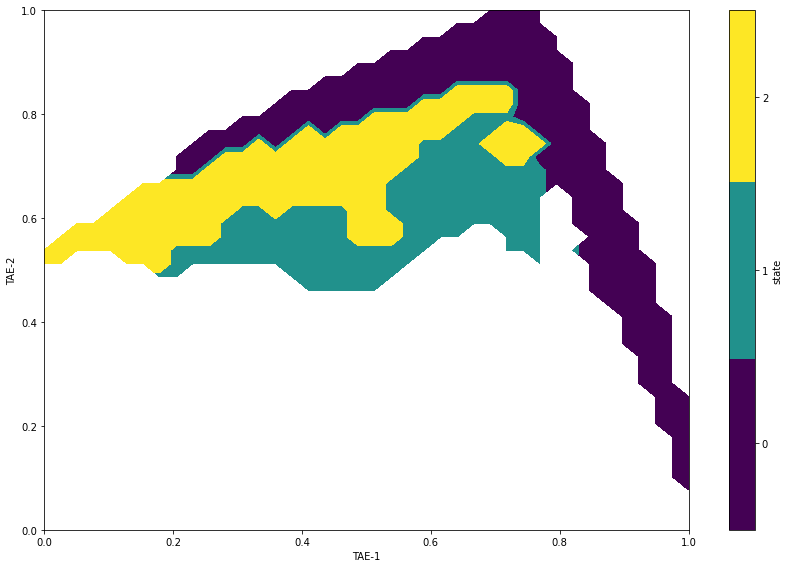

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *scaled_encoded.T,np.concatenate(discrete_trajs),nbins=40, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(0, 3))

ax.set_xlabel('TAE-1')
ax.set_ylabel('TAE-2')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.savefig('3_ststes.png',dpi=300)

## Repeat the process

In [57]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] < 0.0) and (msm.eigenvectors_right()[i,2] < 0.0) and (msm.eigenvectors_right()[i,2] > 0.0):
    
    #(msm.eigenvectors_right()[i,2] > 0.0):
        j1=j1+1
        
    if(msm.eigenvectors_right()[i,1] < 0.0) and (msm.eigenvectors_right()[i,2] < 0.0) and (msm.eigenvectors_right()[i,2] < 0.0):
    
        j2=j2+1
        
print(j1,j2)
Mnnp = np.zeros((j1,4))
Mnnn = np.zeros((j2,4))

0 30


In [59]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] > 0.0) and (msm.eigenvectors_right()[i,2] > 0.0):
    
    #(msm.eigenvectors_right()[i,2] > 0.0):
        j1=j1+1
        
    if(msm.eigenvectors_right()[i,1] > 0.0) and (msm.eigenvectors_right()[i,2] < 0.0):
    
        j2=j2+1
        
print(j1,j2)
Mpp = np.zeros((j1,4))
Mpn = np.zeros((j2,4))

67 342


In [60]:
j1=0;j2=0
for i in range(np.shape(msm.eigenvectors_right())[0]):
    if(msm.eigenvectors_right()[i,1] > 0.0) and (msm.eigenvectors_right()[i,2] > 0.0):
        Mpp[j1][0] = i+1
        Mpp[j1][1] = i
        Mpp[j1][2] = msm.eigenvectors_right()[i,1]
        Mpp[j1][3] = msm.eigenvectors_left()[0,i]
        j1=j1+1
    if(msm.eigenvectors_right()[i,1] > 0.0) and (msm.eigenvectors_right()[i,2] < 0.0):
        Mpn[j2][0] = i+1
        Mpn[j2][1] = i
        Mpn[j2][2] = msm.eigenvectors_right()[i,1]
        Mpn[j2][3] = msm.eigenvectors_left()[0,i]
        j2=j2+1
print("np:  ",np.sum(Mpp[:,3])*100 )
print("nn:  ",np.sum(Mpn[:,3])*100 )

np:   18.981237661396275
nn:   40.223921479451484


In [61]:
for i in range(Mpp.shape[0]):
    temp = np.where(dtrajs==Mpp[i,1])
    discrete_trajs[temp[1]] =0
    
for i in range(Mpn.shape[0]):
    temp = np.where(dtrajs==Mpn[i,1])
    discrete_trajs[temp[1]] =1
    
for i in range(Mnp.shape[0]):
    temp = np.where(dtrajs==Mnp[i,1])
    discrete_trajs[temp[1]] = 2
    
for i in range(Mnn.shape[0]):
    temp = np.where(dtrajs==Mnn[i,1])
    discrete_trajs[temp[1]] = 3

In [62]:
np.save('discrete_trajs_4_states.npy',discrete_trajs)

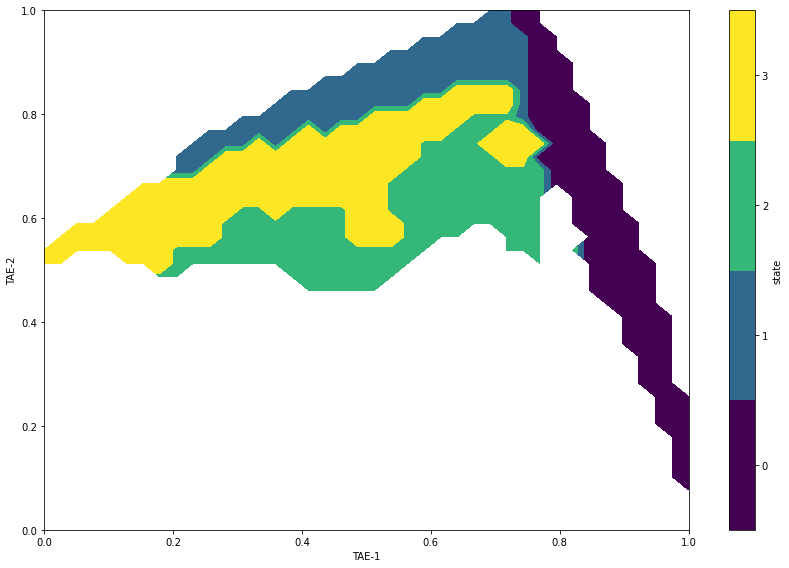

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *scaled_encoded.T,np.concatenate(discrete_trajs),nbins=40, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(0, 4))

ax.set_xlabel('TAE-1')
ax.set_ylabel('TAE-2')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.savefig('4_ststes.png',dpi=300)

## calculate average distance and no of water in the states

In [69]:
discrete_trajs_cat = np.concatenate(discrete_trajs)

In [71]:
unscaled = np.load('Unscaled_data_sorted.npy')
state0=unscaled[discrete_trajs_cat==0]
state1=unscaled[discrete_trajs_cat==1]
state2=unscaled[discrete_trajs_cat==2]
state3=unscaled[discrete_trajs_cat==3]

print(np.mean(state0,axis=0))
print(np.mean(state1,axis=0))
print(np.mean(state2,axis=0))
print(np.mean(state3,axis=0))

[ 2.47870816 28.34710217]
[ 1.71227476 28.95176979]
[0.82386463 5.05558629]
[ 1.14746974 23.5207084 ]


In [67]:
np.concatenate(discrete_trajs==0)

array([False, False, False, ..., False, False, False])